In [34]:
import os

# File paths
pdb_file = "/home/hp/results/MOUSE/level1/F139L/minim/minim.pdb"
output_dir = "/home/hp/results/MOUSE/level1/F139L/replica000"
output_file = os.path.join(output_dir, "residues_49_83_139_196_with_charges.csv")

charge_files = {
    "49": "/home/hp/nayanika/github/GPX6/parameters/qoplsaa.lib",
    "83": "/home/hp/nayanika/github/GPX6/parameters/qoplsaa.lib",
    "139": "/home/hp/nayanika/github/GPX6/parameters/qoplsaa.lib",
    "196": "/home/hp/nayanika/github/GPX6/parameters/GPX.lib"
}

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

target_residues = {"49": "CYS", "83": "GLN", "139": "LEU", "196": "PRX"}

# Function to parse OPLSAA charge file
def parse_oplsaa_lib(file_path):
    charge_data = {}
    with open(file_path, "r") as file:
        lines = file.readlines()
    
    current_res = None
    in_atoms_section = False
    
    for line in lines:
        line = line.strip()
        if not line or line.startswith("#"):
            continue
            
        if line.startswith("{") and "}" in line:
            # New residue definition
            raw_res = line.strip("{}").strip().split('}')[0].strip().upper()
            current_res = raw_res  # Just take the part before any }
            charge_data[current_res] = {}
            in_atoms_section = False
        elif line.lower() == "[atoms]":
            in_atoms_section = True
        elif line.lower() == "[bonds]" or line.lower().startswith("["):
            in_atoms_section = False
        elif in_atoms_section and current_res:
            # Parse atom line: index name type charge
            parts = line.split()
            if len(parts) >= 4:
                atom_name = parts[1]
                charge = float(parts[3])
                charge_data[current_res][atom_name] = charge
    
    return charge_data

# Load all charge data
all_charges = {}
for res_num, file_path in charge_files.items():
    if file_path not in all_charges:
        all_charges[file_path] = parse_oplsaa_lib(file_path)

# Debug: Print found residues in charge files
for file_path, charges in all_charges.items():
    print(f"File: {file_path}")
    print(f"  Residues found: {list(charges.keys())}")
    for res in ["CYS", "GLN", "LEU", "PRX"]:
        if res in charges:
            print(f"  {res} atoms: {list(charges[res].keys())}")

# Extract coordinates and match with charges
coords = []
with open(pdb_file, "r") as file:
    lines = file.readlines()

for line in lines:
    if line.startswith("ATOM") or line.startswith("HETATM"):
        res_name = line[17:20].strip().upper()  # Residue name
        res_num = line[22:26].strip()  # Residue number
        
        if res_num in target_residues and target_residues[res_num].upper() == res_name:
            atom_name = line[12:16].strip()  # Atom name
            x = float(line[30:38].strip())  # X coordinate
            y = float(line[38:46].strip())  # Y coordinate
            z = float(line[46:54].strip())  # Z coordinate
            
            # Get charge from the charge data
            charge = "N/A"  # Default if not found
            charge_file = charge_files[res_num]
            res_name_caps = res_name.upper()
            
            if res_name_caps in all_charges[charge_file] and atom_name in all_charges[charge_file][res_name_caps]:
                charge = all_charges[charge_file][res_name_caps][atom_name]
            
            coords.append(f"{res_num},{res_name},{atom_name},{x},{y},{z},{charge}")

# Save to CSV
with open(output_file, "w") as file:
    file.write("Residue,Residue_Name,Atom,X,Y,Z,Charge\n")
    file.write("\n".join(coords))

print(f"Coordinates and charges of residues 49, 83, 139, and 196 saved to {output_file}")

File: /home/hp/nayanika/github/GPX6/parameters/qoplsaa.lib
  Residues found: ['ALA', 'NAL', 'ALC', 'ARG', 'ARN', 'ASH', 'ASN', 'ASP', 'CLA', 'CYS', 'CYX', 'GLH', 'GLN', 'GLU', 'GLY', 'NGL', 'GLC', 'HID', 'HIE', 'HIP', 'ILE', 'LEU', 'LYN', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'SOD', 'THR', 'HOH', 'TRP', 'TYR', 'VAL', 'NME', 'ACE']
  CYS atoms: ['N', 'HN', 'CA', 'HA', 'CB', 'HB1', 'HB2', 'SG', 'HG1', 'C', 'O']
  GLN atoms: ['N', 'HN', 'CA', 'HA', 'CB', 'HB1', 'HB2', 'CG', 'HG1', 'HG2', 'CD', 'OE1', 'NE2', 'HE21', 'HE22', 'C', 'O']
  LEU atoms: ['N', 'HN', 'CA', 'HA', 'CB', 'HB1', 'HB2', 'CG', 'HG', 'CD1', 'HD11', 'HD12', 'HD13', 'CD2', 'HD21', 'HD22', 'HD23', 'C', 'O']
File: /home/hp/nayanika/github/GPX6/parameters/GPX.lib
  Residues found: ['PRX', 'SEC', 'SNN', 'SEN', 'GLP', 'SUL']
  PRX atoms: ['O1', 'O2', 'H1', 'H2']
Coordinates and charges of residues 49, 83, 139, and 196 saved to /home/hp/results/MOUSE/level1/F139L/replica000/residues_49_83_139_196_with_charges.csv


E_CONV: 332064.0798975316
Loading data from: /home/hp/results/MOUSE/level1/F139L/replica000/residues_49_83_139_196_with_charges.csv
Data loaded successfully: 51 rows

Sample of data to check charges:
   Residue Residue_Name Atom       X       Y       Z  Charge
0       49          CYS    N  35.863  34.346  52.335   -0.50
1       49          CYS   HN  35.519  35.244  52.019    0.30
2       49          CYS   CA  36.712  33.599  51.415    0.14
3       49          CYS   HA  36.595  32.530  51.593    0.06
4       49          CYS   CB  36.242  33.943  49.985    0.06

Unique residues in data: [ 49  83 139 196]

Filtering residues:
CYS49 data: 0 atoms
GLN83 data: 0 atoms
LEU139 data: 0 atoms
PRX196 data: 0 atoms
Residue filtering with string comparison failed. Trying numeric comparison...
After numeric conversion - CYS49 data: 11 atoms
After numeric conversion - GLN83 data: 17 atoms
After numeric conversion - LEU139 data: 19 atoms
After numeric conversion - PRX196 data: 4 atoms
Active site data

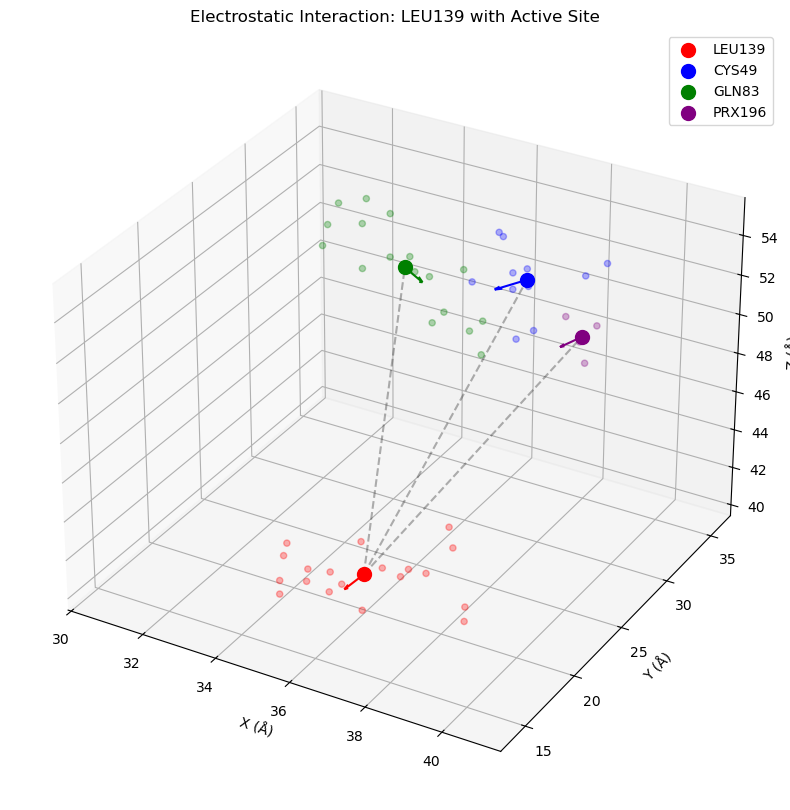

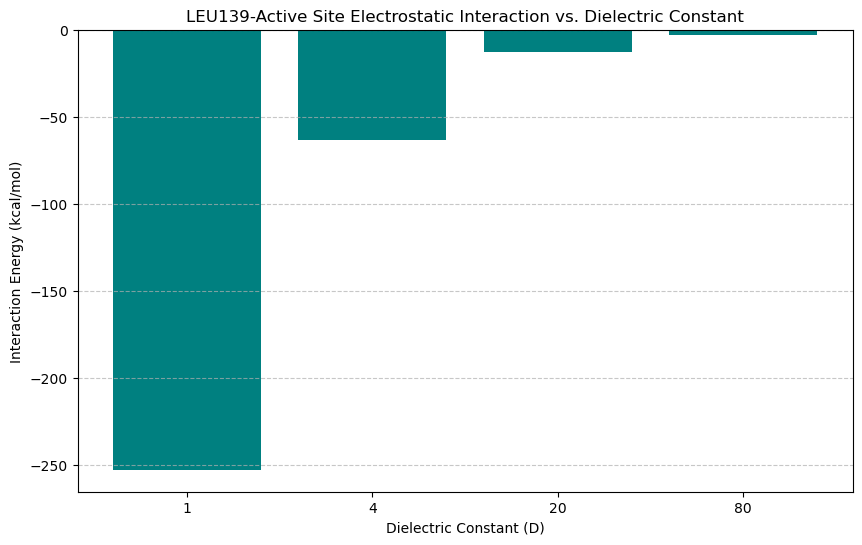


Results saved to electrostatic_analysis.txt

Analysis completed successfully!


In [35]:
import numpy as np
import pandas as pd
import os
from math import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ===========================================================================
# PHYSICAL CONSTANTS AND UNIT CONVERSIONS
# ===========================================================================
# Physical constants

# Constants for electrostatics
COULOMB = 1.602176634e-19  # Charge in Coulombs
EPSILON_0 = 8.8541878128e-12  # Vacuum permittivity in Farads/meter
ANGSTROM_TO_METER = 1e-10  # Conversion factor from Angstrom to meters
N_A = 6.02214076e23  # Avogadro's number in mol^-1
J_TO_KCAL = 0.239006  # Conversion factor from kJ to kcal

# Electrostatic constant calculation (kcal/mol)
E_CONV = (COULOMB**2 * N_A) / (4 * np.pi * EPSILON_0 * ANGSTROM_TO_METER) * J_TO_KCAL

print(f"E_CONV: {E_CONV}")

# ===========================================================================
# FILE CONFIGURATION
# ===========================================================================
# Set up input path
# NOTE: Change this path to where your CSV file is located
csv_file = "/home/hp/results/MOUSE/level1/F139L/replica000/residues_49_83_139_196_with_charges.csv"  # Update this to your actual file path

# ===========================================================================
# DATA LOADING AND VALIDATION
# ===========================================================================
# Print debug information before loading data
print(f"Loading data from: {csv_file}")

try:
    # Load the CSV data containing residue information
    data = pd.read_csv(csv_file)
    
    # Check if data was loaded successfully and print sample
    print(f"Data loaded successfully: {len(data)} rows")
    print("\nSample of data to check charges:")
    print(data.head())
    print(f"\nUnique residues in data: {data['Residue'].unique()}")
except FileNotFoundError:
    # Error handling if file is not found
    print(f"Error: File {csv_file} not found! Please check the file path.")
    exit(1)  # Exit the program if file is not found

# ===========================================================================
# DEFAULT CHARGE DEFINITIONS
# ===========================================================================
# Define default charges for amino acids in case they're missing in the data
# These values are based on common force fields like AMBER
default_charges = {
    'CYS': {
        'N': -0.415, 'H': 0.271, 'CA': 0.021, 'HA': 0.112,
        'CB': -0.122, 'HB2': 0.1112, 'HB3': 0.1112, 'SG': -0.311,
        'HG': 0.193, 'C': 0.597, 'O': -0.567
    },
    'GLN': {
        'N': -0.415, 'H': 0.271, 'CA': 0.021, 'HA': 0.112,
        'CB': -0.052, 'HB2': 0.09, 'HB3': 0.09, 'CG': -0.043,
        'HG2': 0.09, 'HG3': 0.09, 'CD': 0.675, 'OE1': -0.47,
        'NE2': -0.867, 'HE21': 0.344, 'HE22': 0.344, 'C': 0.597, 'O': -0.567
    },
    'LEU': {
        'N': -0.415, 'H': 0.271, 'CA': 0.021, 'HA': 0.112,
        'CB': -0.11, 'HB2': 0.09, 'HB3': 0.09, 'CG': -0.001,
        'HG': 0.09, 'CD1': -0.107, 'HD11': 0.07, 'HD12': 0.07, 'HD13': 0.07,
        'CD2': -0.107, 'HD21': 0.07, 'HD22': 0.07, 'HD23': 0.07,
        'C': 0.597, 'O': -0.567
    },
    'PRX': {  # Peroxiredoxin active site charges
        'O1': -0.418, 'O2': -0.418, 'H1': 0.418, 'H2': 0.418
    }
}

# ===========================================================================
# DATA PREPROCESSING
# ===========================================================================
# Function to apply default charges when needed
def apply_default_charges(row):
    """
    Apply default charges to atoms when they're missing or invalid in the data
    """
    if pd.isna(row['Charge']) or row['Charge'] == 'N/A':
        # If charge is missing, get from default_charges dictionary
        res_name = row['Residue_Name']
        atom_name = row['Atom']
        if res_name in default_charges and atom_name in default_charges[res_name]:
            return default_charges[res_name][atom_name]
    elif isinstance(row['Charge'], str):
        # Convert string charges to float
        try:
            return float(row['Charge'])
        except ValueError:
            return 0.0
    return row['Charge']

# Make sure all charges are numeric values
data['Charge'] = data.apply(apply_default_charges, axis=1)
data['Charge'] = pd.to_numeric(data['Charge'], errors='coerce').fillna(0.0)

# ===========================================================================
# FILTER DATA BY RESIDUE
# ===========================================================================
# Extract data for each residue of interest
print("\nFiltering residues:")
# Filter datasets by residue number
cys49_data = data[data['Residue'] == '49']
gln83_data = data[data['Residue'] == '83']
leu139_data = data[data['Residue'] == '139']
prx196_data = data[data['Residue'] == '196']

# Check if filtering worked correctly
print(f"CYS49 data: {len(cys49_data)} atoms")
print(f"GLN83 data: {len(gln83_data)} atoms")
print(f"LEU139 data: {len(leu139_data)} atoms")
print(f"PRX196 data: {len(prx196_data)} atoms")

# If string comparison didn't work, try numeric comparison
if len(cys49_data) == 0 or len(gln83_data) == 0 or len(leu139_data) == 0 or len(prx196_data) == 0:
    print("Residue filtering with string comparison failed. Trying numeric comparison...")
    # Convert residue to numeric and try filtering again
    data['Residue_Num'] = pd.to_numeric(data['Residue'], errors='coerce').fillna(0)
    cys49_data = data[data['Residue_Num'] == 49]
    gln83_data = data[data['Residue_Num'] == 83]
    leu139_data = data[data['Residue_Num'] == 139]
    prx196_data = data[data['Residue_Num'] == 196]
    
    print(f"After numeric conversion - CYS49 data: {len(cys49_data)} atoms")
    print(f"After numeric conversion - GLN83 data: {len(gln83_data)} atoms")
    print(f"After numeric conversion - LEU139 data: {len(leu139_data)} atoms")
    print(f"After numeric conversion - PRX196 data: {len(prx196_data)} atoms")

# Combine active site residues (excluding LEU139)
active_site_data = pd.concat([cys49_data, gln83_data, prx196_data])
print(f"Active site data: {len(active_site_data)} atoms")

# ===========================================================================
# CALCULATION FUNCTIONS
# ===========================================================================
# Function to calculate center of mass for a residue
def calculate_center(residue_data):
    """
    Calculate the center (average position) of all atoms in a residue
    """
    if residue_data.empty:
        print("Warning: Empty residue data for center calculation")
        return np.array([0, 0, 0])
    
    # Calculate average X, Y, Z coordinates
    x = residue_data['X'].mean()
    y = residue_data['Y'].mean()
    z = residue_data['Z'].mean()
    center = np.array([x, y, z])
    return center

# Function to calculate dipole moment for a residue
def calculate_dipole_moment(residue_data):
    """
    Calculate the dipole moment of a residue based on atomic charges and positions
    """
    if residue_data.empty:
        print("Warning: Empty residue data for dipole calculation")
        return np.array([0, 0, 0])
    
    # Get center of residue
    center = calculate_center(residue_data)
    dipole = np.array([0.0, 0.0, 0.0])
    
    # Calculate dipole as sum of charge * position vectors
    for _, atom in residue_data.iterrows():
        charge = atom['Charge']
        pos = np.array([atom['X'], atom['Y'], atom['Z']])
        r_vector = pos - center  # Vector from center to atom
        dipole += charge * r_vector
    
    return dipole

# Function to calculate electrostatic interaction between residues
def calculate_interaction(residue_data, active_site_data, D):
    """
    Calculate electrostatic interaction energy using Coulomb's law:
    E = Σ(i)Σ(j) q_i*q_j / (4πε₀*D*r_ij)
    where i runs over residue atoms and j runs over active site atoms
    D is the dielectric constant of the medium
    """
    if residue_data.empty or active_site_data.empty:
        print(f"Warning: Empty data for interaction calculation (D={D})")
        return 0.0
    
    energy = 0.0
    significant_interactions = 0
    
    # Double loop over all atom pairs
    for _, atom_i in residue_data.iterrows():
        q_i = atom_i['Charge']
        pos_i = np.array([atom_i['X'], atom_i['Y'], atom_i['Z']])
        
        for _, atom_j in active_site_data.iterrows():
            q_j = atom_j['Charge']
            
            # Skip if atoms are in the same residue
            if atom_i['Residue'] == atom_j['Residue']:
                continue
                
            pos_j = np.array([atom_j['X'], atom_j['Y'], atom_j['Z']])
            
            # Calculate distance between atoms
            r_ij = np.linalg.norm(pos_i - pos_j)
            if r_ij < 0.1:  # Avoid self-interaction or very close atoms
                continue
                
            # Calculate energy contribution using Coulomb's law in kcal/mol
            e_ij = (q_i * q_j * E_CONV) / (D * r_ij)  # Now correctly in kcal/mol
            print(f"q_i={q_i}, q_j={q_j}, r_ij={r_ij}, e_ij={e_ij}")
            energy += e_ij

            # Count significant interactions (> 1 kcal/mol)
            if abs(e_ij) > 1.0:
                significant_interactions += 1
    
    print(f"Calculated interaction energy for D={D}: {energy:.20f} kcal/mol ({significant_interactions} significant interactions)")
    return energy

# Function to calculate distances between residue centers
def calculate_distances():
    """
    Calculate distances between centers of all residue pairs
    """
    distances = {}
    
    # Calculate LEU139 to CYS49 distance
    if not leu139_data.empty and not cys49_data.empty:
        leu139_center = calculate_center(leu139_data)
        cys49_center = calculate_center(cys49_data)
        distances['LEU139_to_CYS49'] = np.linalg.norm(leu139_center - cys49_center)
    else:
        distances['LEU139_to_CYS49'] = 0
    
    # Calculate LEU139 to GLN83 distance
    if not leu139_data.empty and not gln83_data.empty:
        leu139_center = calculate_center(leu139_data)
        gln83_center = calculate_center(gln83_data)
        distances['LEU139_to_GLN83'] = np.linalg.norm(leu139_center - gln83_center)
    else:
        distances['LEU139_to_GLN83'] = 0
    
    # Calculate LEU139 to PRX196 distance
    if not leu139_data.empty and not prx196_data.empty:
        leu139_center = calculate_center(leu139_data)
        prx196_center = calculate_center(prx196_data)
        distances['LEU139_to_PRX196'] = np.linalg.norm(leu139_center - prx196_center)
    else:
        distances['LEU139_to_PRX196'] = 0
    
    # Calculate CYS49 to GLN83 distance
    if not cys49_data.empty and not gln83_data.empty:
        cys49_center = calculate_center(cys49_data)
        gln83_center = calculate_center(gln83_data)
        distances['CYS49_to_GLN83'] = np.linalg.norm(cys49_center - gln83_center)
    else:
        distances['CYS49_to_GLN83'] = 0
    
    # Calculate CYS49 to PRX196 distance
    if not cys49_data.empty and not prx196_data.empty:
        cys49_center = calculate_center(cys49_data)
        prx196_center = calculate_center(prx196_data)
        distances['CYS49_to_PRX196'] = np.linalg.norm(cys49_center - prx196_center)
    else:
        distances['CYS49_to_PRX196'] = 0
    
    # Calculate GLN83 to PRX196 distance
    if not gln83_data.empty and not prx196_data.empty:
        gln83_center = calculate_center(gln83_data)
        prx196_center = calculate_center(prx196_data)
        distances['GLN83_to_PRX196'] = np.linalg.norm(gln83_center - prx196_center)
    else:
        distances['GLN83_to_PRX196'] = 0
    
    return distances

# ===========================================================================
# PERFORM CALCULATIONS
# ===========================================================================
print("\nCalculating centers and dipoles...")
# Calculate dipole moments for each residue
leu139_dipole = calculate_dipole_moment(leu139_data)
cys49_dipole = calculate_dipole_moment(cys49_data)
gln83_dipole = calculate_dipole_moment(gln83_data)
prx196_dipole = calculate_dipole_moment(prx196_data)
active_site_dipole = calculate_dipole_moment(active_site_data)

# Calculate centers for each residue
leu139_center = calculate_center(leu139_data)
cys49_center = calculate_center(cys49_data)
gln83_center = calculate_center(gln83_data)
prx196_center = calculate_center(prx196_data)
active_site_center = calculate_center(active_site_data)

# Calculate distances between all residue pairs
distances = calculate_distances()

print("\nDistances:")
for name, distance in distances.items():
    print(f"{name}: {distance:.2f} Å")

# Calculate electrostatic interactions for different dielectric constants
print("\nCalculating electrostatic interactions...")
# Different dielectric constants represent different environments:
# D=1: vacuum, D=4: protein interior, D=20: protein-water interface, D=80: bulk water
dielectric_constants = [1, 4, 20, 80]
interactions = {}

# Calculate interaction energy for each dielectric constant
for D in dielectric_constants:
    energy = calculate_interaction(leu139_data, active_site_data, D)
    interactions[D] = energy

# ===========================================================================
# PRINT RESULTS
# ===========================================================================
print("\nDipole Moment Analysis:")
print(f"LEU139 Dipole: {leu139_dipole} (magnitude: {np.linalg.norm(leu139_dipole):.4f})")
print(f"CYS49 Dipole: {cys49_dipole} (magnitude: {np.linalg.norm(cys49_dipole):.4f})")
print(f"GLN83 Dipole: {gln83_dipole} (magnitude: {np.linalg.norm(gln83_dipole):.4f})")
print(f"PRX196 Dipole: {prx196_dipole} (magnitude: {np.linalg.norm(prx196_dipole):.4f})")
print(f"Active Site Dipole: {active_site_dipole} (magnitude: {np.linalg.norm(active_site_dipole):.4f})")
print("\nElectrostatic Interactions (LEU139 with Active Site):")
for D, energy in interactions.items():
    print(f"Dielectric D = {D}: {energy:.4f} kcal/mol")

# ===========================================================================
# CREATE VISUALIZATIONS - DISPLAY ONLY
# ===========================================================================
# Only create visualizations if we have data for all residues
if not (leu139_data.empty or cys49_data.empty or gln83_data.empty or prx196_data.empty):
    print("\nCreating 3D visualization...")
    
    # Create a 3D visualization of residues and dipoles
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot residue centers with different colors
    ax.scatter(leu139_center[0], leu139_center[1], leu139_center[2], color='red', s=100, label='LEU139')
    ax.scatter(cys49_center[0], cys49_center[1], cys49_center[2], color='blue', s=100, label='CYS49')
    ax.scatter(gln83_center[0], gln83_center[1], gln83_center[2], color='green', s=100, label='GLN83')
    ax.scatter(prx196_center[0], prx196_center[1], prx196_center[2], color='purple', s=100, label='PRX196')

    # Plot individual atoms with transparency to show distribution
    if not leu139_data.empty:
        ax.scatter(leu139_data['X'], leu139_data['Y'], leu139_data['Z'], color='red', s=20, alpha=0.3)
    if not cys49_data.empty:
        ax.scatter(cys49_data['X'], cys49_data['Y'], cys49_data['Z'], color='blue', s=20, alpha=0.3)
    if not gln83_data.empty:
        ax.scatter(gln83_data['X'], gln83_data['Y'], gln83_data['Z'], color='green', s=20, alpha=0.3)
    if not prx196_data.empty:
        ax.scatter(prx196_data['X'], prx196_data['Y'], prx196_data['Z'], color='purple', s=20, alpha=0.3)

    # Scale factor for diploles (adjust for visibility)
    scale = 2.0

    # Plot dipole vectors if they're significant (non-zero)
    if np.linalg.norm(leu139_dipole) > 0.01:
        ax.quiver(leu139_center[0], leu139_center[1], leu139_center[2], 
                leu139_dipole[0], leu139_dipole[1], leu139_dipole[2], 
                color='red', arrow_length_ratio=0.2, length=scale)

    if np.linalg.norm(cys49_dipole) > 0.01:
        ax.quiver(cys49_center[0], cys49_center[1], cys49_center[2], 
                cys49_dipole[0], cys49_dipole[1], cys49_dipole[2], 
                color='blue', arrow_length_ratio=0.2, length=scale)

    if np.linalg.norm(gln83_dipole) > 0.01:
        ax.quiver(gln83_center[0], gln83_center[1], gln83_center[2], 
                gln83_dipole[0], gln83_dipole[1], gln83_dipole[2], 
                color='green', arrow_length_ratio=0.2, length=scale)

    if np.linalg.norm(prx196_dipole) > 0.01:
        ax.quiver(prx196_center[0], prx196_center[1], prx196_center[2], 
                prx196_dipole[0], prx196_dipole[1], prx196_dipole[2], 
                color='purple', arrow_length_ratio=0.2, length=scale)

    # Draw dashed lines between LEU139 and active site residues to show distances
    ax.plot([leu139_center[0], cys49_center[0]], 
            [leu139_center[1], cys49_center[1]], 
            [leu139_center[2], cys49_center[2]], 'k--', alpha=0.3)

    ax.plot([leu139_center[0], gln83_center[0]], 
            [leu139_center[1], gln83_center[1]], 
            [leu139_center[2], gln83_center[2]], 'k--', alpha=0.3)

    ax.plot([leu139_center[0], prx196_center[0]], 
            [leu139_center[1], prx196_center[1]], 
            [leu139_center[2], prx196_center[2]], 'k--', alpha=0.3)

    # Set labels and title for the 3D plot
    ax.set_xlabel('X (Å)')
    ax.set_ylabel('Y (Å)')
    ax.set_zlabel('Z (Å)')
    ax.set_title('Electrostatic Interaction: LEU139 with Active Site')
    ax.legend()

    # Calculate appropriate plot limits with padding
    all_x = np.concatenate([leu139_data['X'], cys49_data['X'], gln83_data['X'], prx196_data['X']])
    all_y = np.concatenate([leu139_data['Y'], cys49_data['Y'], gln83_data['Y'], prx196_data['Y']])
    all_z = np.concatenate([leu139_data['Z'], cys49_data['Z'], gln83_data['Z'], prx196_data['Z']])
    
    x_range = max(all_x) - min(all_x)
    y_range = max(all_y) - min(all_y)
    z_range = max(all_z) - min(all_z)
    padding = max(x_range, y_range, z_range) * 0.1  # 10% padding
    
    ax.set_xlim([min(all_x) - padding, max(all_x) + padding])
    ax.set_ylim([min(all_y) - padding, max(all_y) + padding])
    ax.set_zlim([min(all_z) - padding, max(all_z) + padding])

    # Create a 2D bar chart for electrostatic interactions at different dielectric constants
    plt.figure(figsize=(10, 6))
    plt.bar([str(d) for d in dielectric_constants], [interactions[d] for d in dielectric_constants], color='teal')
    plt.xlabel('Dielectric Constant (D)')
    plt.ylabel('Interaction Energy (kcal/mol)')  # Changed from kJ/mol to kcal/mol
    plt.title('LEU139-Active Site Electrostatic Interaction vs. Dielectric Constant')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show all plots (instead of saving)
    plt.show()
    
else:
    print("\nSkipping visualizations due to missing data")

# ===========================================================================
# SAVE RESULTS TO FILE - TEXT ONLY
# ===========================================================================
# Write all results to a text file for reference
results_file = "electrostatic_analysis.txt"
with open(results_file, "w") as f:
    f.write("Electrostatic Analysis for F139L Mutation\n")
    f.write("=======================================\n\n")
    f.write("Residue Data:\n")
    f.write(f"CYS49: {len(cys49_data)} atoms\n")
    f.write(f"GLN83: {len(gln83_data)} atoms\n")
    f.write(f"LEU139: {len(leu139_data)} atoms\n")
    f.write(f"PRX196: {len(prx196_data)} atoms\n\n")
    
    f.write("Distances:\n")
    for name, distance in distances.items():
        f.write(f"{name}: {distance:.2f} Å\n")
    f.write("\n")
    
    f.write("Dipole Moment Analysis:\n")
    f.write(f"LEU139 Dipole Vector: [{leu139_dipole[0]:.4f}, {leu139_dipole[1]:.4f}, {leu139_dipole[2]:.4f}]\n")
    f.write(f"LEU139 Dipole Magnitude: {np.linalg.norm(leu139_dipole):.4f}\n\n")
    f.write(f"CYS49 Dipole Vector: [{cys49_dipole[0]:.4f}, {cys49_dipole[1]:.4f}, {cys49_dipole[2]:.4f}]\n")
    f.write(f"CYS49 Dipole Magnitude: {np.linalg.norm(cys49_dipole):.4f}\n\n")
    f.write(f"GLN83 Dipole Vector: [{gln83_dipole[0]:.4f}, {gln83_dipole[1]:.4f}, {gln83_dipole[2]:.4f}]\n")
    f.write(f"GLN83 Dipole Magnitude: {np.linalg.norm(gln83_dipole):.4f}\n\n")
    f.write(f"PRX196 Dipole Vector: [{prx196_dipole[0]:.4f}, {prx196_dipole[1]:.4f}, {prx196_dipole[2]:.4f}]\n")
    f.write(f"PRX196 Dipole Magnitude: {np.linalg.norm(prx196_dipole):.4f}\n\n")
    f.write(f"Active Site Dipole Vector: [{active_site_dipole[0]:.4f}, {active_site_dipole[1]:.4f}, {active_site_dipole[2]:.4f}]\n")
    f.write(f"Active Site Dipole Magnitude: {np.linalg.norm(active_site_dipole):.4f}\n\n")
    f.write("Electrostatic Interactions (LEU139 with Active Site):\n")
    for D, energy in interactions.items():
        f.write(f"Dielectric D = {D}: {energy:.20f} kcal/mol\n")  # Changed from kJ/mol to kcal/mol

print(f"\nResults saved to {results_file}")
print("\nAnalysis completed successfully!")